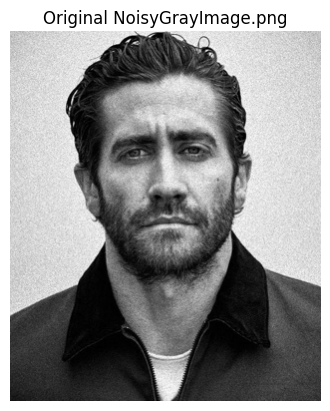

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter
from skimage.restoration import denoise_bilateral
import cv2


def load_images():
    # Load dog image with alpha channel
    img = Image.open('OPTI536_Homework_1_Images/NoisyGrayImage.png').convert('L')
    # Convert to numpy array and separate alpha
    # Convert to numpy array and normalize to 0-1
    img = np.array(img) / 255.0
    return img


def bilateral_filter(image, sigma_s, sigma_b):
    """
    Apply bilateral filter to an image
    
    Parameters:
    image: 2D numpy array of the input image (normalized to 0-1)
    sigma_s: spatial sigma (standard deviation for spatial gaussian)
    sigma_b: brightness sigma (standard deviation for intensity gaussian)
    
    Returns:
    filtered image as 2D numpy array
    """
    # Get image dimensions
    height, width = image.shape
    
    # Create a padded version of the image to handle boundaries
    pad_size = int(3 * sigma_s)
    padded_image = np.pad(image, pad_size, mode='edge')
    
    # Create output image
    filtered_image = np.zeros_like(image)
    
    # Create spatial gaussian kernel
    x, y = np.meshgrid(np.arange(-pad_size, pad_size + 1), 
                      np.arange(-pad_size, pad_size + 1))
    spatial_kernel = np.exp(-(x**2 + y**2) / (2 * sigma_s**2))
    
    # Apply filter
    for i in range(height):
        for j in range(width):
            # Extract window
            window = padded_image[i:i + 2*pad_size + 1, 
                                j:j + 2*pad_size + 1]
            
            # Calculate intensity gaussian
            intensity_diff = window - padded_image[i + pad_size, j + pad_size]
            intensity_kernel = np.exp(-(intensity_diff**2) / (2 * sigma_b**2))
            
            # Combine kernels and normalize
            kernel = spatial_kernel * intensity_kernel
            kernel = kernel / np.sum(kernel)
            
            # Apply filter to center pixel
            filtered_image[i, j] = np.sum(window * kernel)
    
    return filtered_image

def plot_bilateral_results(image, filtered_results):
    """
    Plot bilateral filter results with custom filters in row 1 and skimage filters in row 2
    
    Parameters:
    image: Original input image
    filtered_results: Dictionary of filtered images with parameter descriptions
    """
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    
    # Plot original image in both rows
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    axes[1, 0].imshow(image, cmap='gray')
    axes[1, 0].set_title('Original Image')
    axes[1, 0].axis('off')
    
    # Separate custom and skimage results
    custom_results = {k: v for k, v in filtered_results.items() if 'Custom' in k}
    skimage_results = {k: v for k, v in filtered_results.items() if 'opencv' in k}
    
    # Plot custom results in first row
    for idx, (title, img) in enumerate(sorted(custom_results.items())):
        axes[0, idx + 1].imshow(img, cmap='gray')
        axes[0, idx + 1].set_title(title)
        axes[0, idx + 1].axis('off')
    
    # Plot skimage results in second row
    for idx, (title, img) in enumerate(sorted(skimage_results.items())):
        axes[1, idx + 1].imshow(img, cmap='gray')
        axes[1, idx + 1].set_title(title)
        axes[1, idx + 1].axis('off')
    
    plt.tight_layout()
    return fig

def opencv_bilateral_filter(image, sigma_s, sigma_b):
    """
    Apply OpenCV's bilateral filter
    
    Parameters:
    image: Input image (0-1 range)
    sigma_s: Spatial sigma
    sigma_b: Brightness sigma
    
    Returns:
    Filtered image
    """
    # Convert image to 0-255 range for OpenCV
    img_255 = (image * 255).astype(np.uint8)
    
    # Apply bilateral filter
    # d = -1 means that the filter diameter will be calculated from sigma_s
    d = int(sigma_s * 3) * 2 + 1  # Convert sigma to diameter
    sigma_color = sigma_b * 255  # Convert normalized sigma_b to 0-255 range
    
    filtered = cv2.bilateralFilter(img_255, d, sigma_color, sigma_s)
    
    # Convert back to 0-1 range
    return filtered.astype(float) / 255

def skimage_bilateral_filter(image, sigma_s, sigma_b):
    """
    Apply scikit-image's bilateral filter
    
    Parameters:
    image: Input image (0-1 range)
    sigma_s: Spatial sigma
    sigma_b: Brightness sigma
    
    Returns:
    Filtered image
    """
    return denoise_bilateral(image, 
                            mode='edge',
                           sigma_spatial=sigma_s,
                           sigma_color=sigma_b,
                           channel_axis=None)

def apply_bilateral_combinations(image, sigma_s_values, sigma_b_values):
    """
    Apply bilateral filter with different parameter combinations
    
    Parameters:
    image: Input image
    sigma_s_values: List of spatial sigma values
    sigma_b_values: List of brightness sigma values
    
    Returns:
    Dictionary of filtered images
    """
    results = {}
    
    for sigma_s in sigma_s_values:
        for sigma_b in sigma_b_values:
            # Apply custom bilateral filter
            filtered = bilateral_filter(image, sigma_s, sigma_b)
            title = f'Custom (σs={sigma_s}, σb={sigma_b})'
            results[title] = filtered
            
            # For comparison with MATLAB's imbilatfilt
            title = f'opencv (σs={sigma_s}, σb={sigma_b})'
            results[title] = opencv_bilateral_filter(image, sigma_s, sigma_b)
    
    return results

# Main execution
if __name__ == "__main__":
    # Load images
    noisy_img = load_images()
        # Plot background
    plt.figure()
    plt.imshow(noisy_img, cmap='gray')  # Add cmap='gray' for grayscale display
    plt.title('Original NoisyGrayImage.png')
    plt.axis('off')
    plt.show()

    sigma_s_values = [3,10]
    sigma_b_values = [0.2,0.4]
    bl_filtered_image = apply_bilateral_combinations(noisy_img, sigma_s_values,sigma_b_values)
    # Explain the function of the two parameters of 𝜎𝑏, 𝜎𝑠 in the bilateral filter. What are typical value ranges for these parameters, assuming that you have an 8-bit image? Explain your answer. Ans: 2^8 = 256, 0-255, and it needs to be normalized by 255

C. Plot results

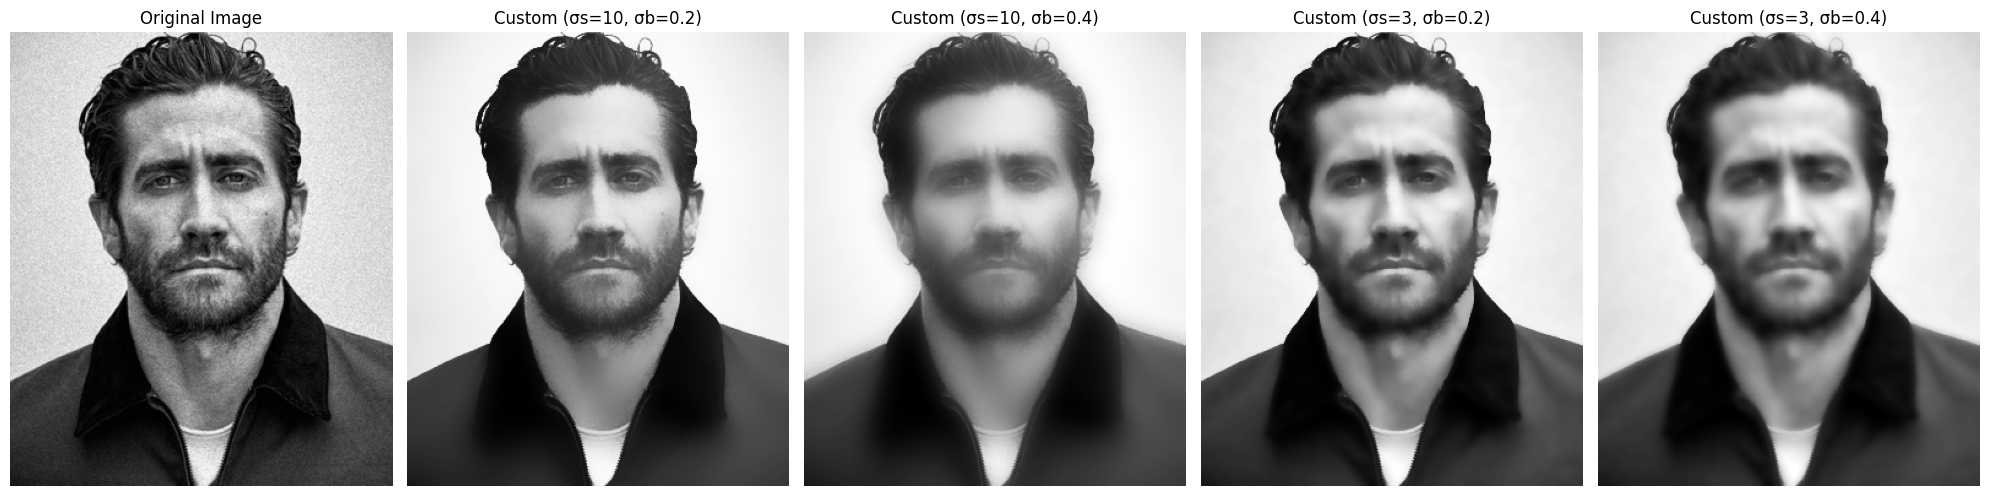

In [5]:
def plot_custom_results(image, filtered_results):
    """
    Plot bilateral filter results with custom filters in row 1 and skimage filters in row 2
    
    Parameters:
    image: Original input image
    filtered_results: Dictionary of filtered images with parameter descriptions
    """
    fig, axes = plt.subplots(1, 5, figsize=(20, 8))
    
    # Plot original image in both rows
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    
    # Separate custom and skimage results
    custom_results = {k: v for k, v in filtered_results.items() if 'Custom' in k}
    
    # Plot custom results in first row
    for idx, (title, img) in enumerate(sorted(custom_results.items())):
        axes[idx + 1].imshow(img, cmap='gray')
        axes[idx + 1].set_title(title)
        axes[idx + 1].axis('off')
    
    
    plt.tight_layout()
    return fig

custom_bilateral = plot_custom_results(noisy_img,bl_filtered_image)
plt.show()

D. Plot comparisons

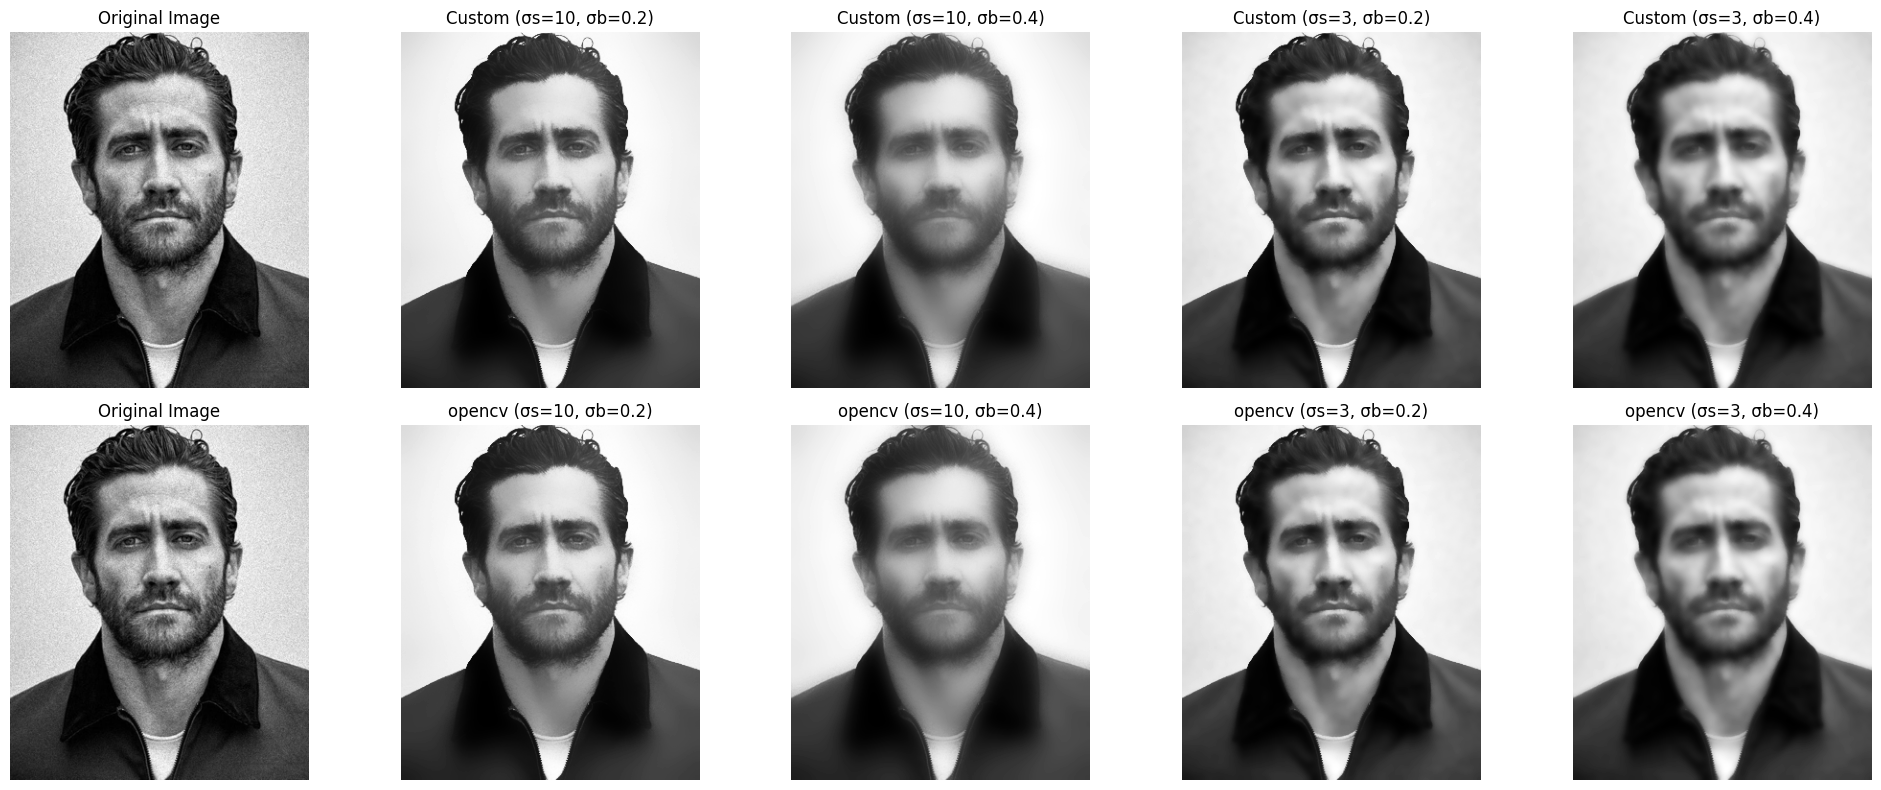

In [ ]:
r1 = plot_bilateral_results(noisy_img,bl_filtered_image)
plt.show()
# need to explain why, 
#  Plot all four results and explain the differences you see and WHY you see these differences

E. Fun and extra case with sigma_s_values = [10] and sigma_b_values = [0.2,0.4,256]

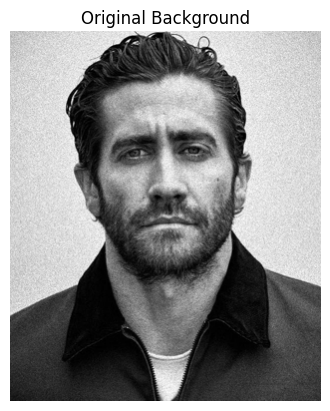

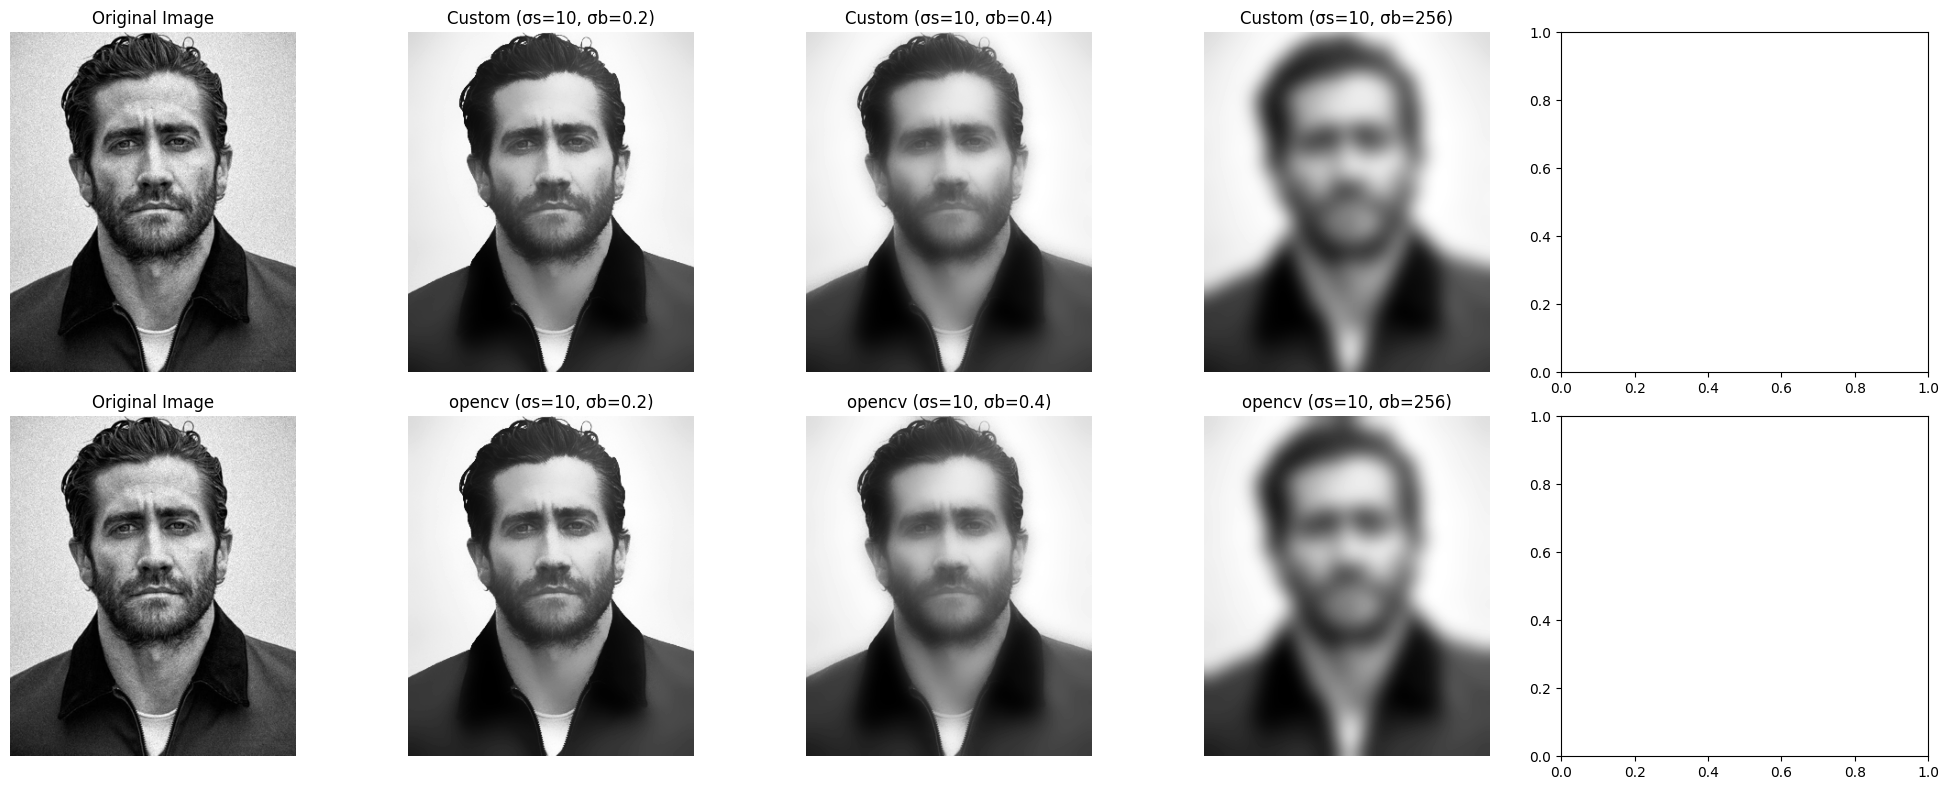

In [8]:
# Main execution
if __name__ == "__main__":
    # Load images
    noisy_img = load_images()
        # Plot background
    plt.figure()
    plt.imshow(noisy_img, cmap='gray')  # Add cmap='gray' for grayscale display
    plt.title('Original Background')
    plt.axis('off')
    plt.show()

    sigma_s_values = [10]
    sigma_b_values = [0.2,0.4,256]
    bl_filtered_image = apply_bilateral_combinations(noisy_img, sigma_s_values,sigma_b_values)
    r2 = plot_bilateral_results(noisy_img,bl_filtered_image)
plt.show()
### need to exaplain why, problaby need to plot 1d dim signal to explain this